# Comparison CUTonalá and PVlib forecast using GFS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [2]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [3]:
cec_modules = pvlib.pvsystem.retrieve_sam('CECMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

cec_module = cec_modules['Canadian_Solar_Inc__CS6X_320P']
cec_inverter = cec_inverters['INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_40TL_U_M__480V_']

In [4]:
latitude= 20.56
longitude= -103.22
altitude=1544
tz='America/Mexico_City'

In [5]:
location = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz=tz)

In [6]:
surface_tilt = 25
surface_azimuth = 180 # pvlib uses 0=North, 90=East, 180=South, 270=West convention
albedo = 0.2

In [7]:
system = PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth,
                 module_parameters=cec_module,
                 inverter_parameters=cec_inverter,
                 temperature_model_parameters=temperature_model_parameters,
                 albedo=albedo, surface_type=None, module=None, 
                 module_type='glass_polymer',
                 modules_per_string=19.5, 
                 strings_per_inverter=8, inverter=None, 
                 racking_model='open_rack', 
                 losses_parameters=None, 
                 name='Name of PV system: Huerto de Cutonalá')

In [8]:
mc = ModelChain(system, location, name='Huerto de Cutonalá', 
                clearsky_model='ineichen', transposition_model='haydavies', 
                solar_position_method='nrel_numpy', airmass_model='kastenyoung1989',
                dc_model=None, #from module specifications
                ac_model='sandia', #from inverter specifications
                aoi_model='no_loss', 
                spectral_model='no_loss', #spectral model 'no loss' otherwise error
                temperature_model='sapm', losses_model='no_loss')

In [9]:
import datetime
#Variables de tiempo

start = pd.Timestamp(datetime.date.today(), tz='America/Mexico_City') # today's date
end = start + pd.Timedelta(days=7) # 7 days from today

#9 de diciebre a partir del 16 de diciembre
start9_dec = start - pd.Timedelta(days=9)
end9_dec = start9_dec + pd.Timedelta(days=1)

In [12]:
from pvlib import solarposition, irradiance, atmosphere, pvsystem, inverter, temperature, iam
from pvlib.forecast import NAM

/Users/luisvargas/Desktop/Tesis Pvlib/env_pvlib_tesis/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [13]:
# Se define el modelo de pronostico
fm = NAM()

In [14]:
# Se obtiene la data y se procesa del modelo de pronostico
forecast_data = fm.get_processed_data(latitude, longitude, start9_dec, end9_dec)

In [15]:
#pd.set_option('display.max_columns', None)
forecast_data.head()

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-12-09 06:00:00-06:00,16.306824,1.363817,0.000000,0.000000,0.000000,100.0,0.0,100.0,0.0
2020-12-09 07:00:00-06:00,15.942230,1.504211,0.000000,0.000000,0.000000,100.0,24.0,100.0,0.0
2020-12-09 08:00:00-06:00,15.491943,1.286929,29.258507,0.000000,29.258507,94.0,70.0,94.0,0.0
2020-12-09 09:00:00-06:00,15.510132,0.573932,133.073440,16.594241,127.412980,84.0,80.0,84.0,0.0
2020-12-09 10:00:00-06:00,15.297089,0.510045,210.747766,24.549396,198.212463,88.0,85.0,88.0,0.0


In [16]:
ghi = forecast_data['ghi']
dni = forecast_data['dni']
dhi = forecast_data['dhi']
temp_air = forecast_data['temp_air']
wind_speed = forecast_data['wind_speed']
indexDF = forecast_data.index

In [17]:
weather = pd.DataFrame([dni, ghi, dhi, temp_air, wind_speed]).T

In [18]:
mc.run_model(weather)

ModelChain: 
  name: Huerto de Cutonalá
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [19]:
mc.dc

,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
2020-12-09 06:00:00-06:00,2.584939e-26,0.000000,2.584939e-26,0.000000,0.000000,2.584939e-26,2.584939e-26
2020-12-09 07:00:00-06:00,-2.584939e-26,0.000000,-2.584939e-26,0.000000,-0.000000,-2.584939e-26,-2.584939e-26
2020-12-09 08:00:00-06:00,2.080523e+00,787.422371,1.959441e+00,682.306463,1336.939119,2.066262e+00,1.601887e+00
2020-12-09 09:00:00-06:00,9.808702e+00,828.896701,9.243078e+00,715.309600,6611.662205,9.738062e+00,7.449049e+00
2020-12-09 10:00:00-06:00,1.556207e+01,837.402442,1.466193e+01,718.285257,10531.450456,1.544895e+01,1.167401e+01
2020-12-09 11:00:00-06:00,1.962113e+01,840.977677,1.847595e+01,718.374525,13272.652089,1.947797e+01,1.457468e+01
2020-12-09 12:00:00-06:00,1.854521e+01,842.006789,1.746829e+01,720.392266,12584.017492,1.840970e+01,1.381838e+01
2020-12-09 13:00:00-06:00,1.901513e+01,843.294522,1.790675e+01,721.494006,12919.615468,1.887596e+01,1.414521e+01
2020-12-09 14:00:00-06:00,3.057278e+01,842.391947,2.874018e+01,710.366460,20416.062408,3.034967e+01,2.211636e+01
2020-12-09 15:00:00-06:00,2.602406e+01,835.853538,2.446946e+01,707.380306,17309.213810,2.583564e+01,1.900496e+01


In [20]:
forecast_dc = mc.dc.reset_index()
forecast_dc

,index,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
0,2020-12-09 06:00:00-06:00,2.584939e-26,0.000000,2.584939e-26,0.000000,0.000000,2.584939e-26,2.584939e-26
1,2020-12-09 07:00:00-06:00,-2.584939e-26,0.000000,-2.584939e-26,0.000000,-0.000000,-2.584939e-26,-2.584939e-26
2,2020-12-09 08:00:00-06:00,2.080523e+00,787.422371,1.959441e+00,682.306463,1336.939119,2.066262e+00,1.601887e+00
3,2020-12-09 09:00:00-06:00,9.808702e+00,828.896701,9.243078e+00,715.309600,6611.662205,9.738062e+00,7.449049e+00
4,2020-12-09 10:00:00-06:00,1.556207e+01,837.402442,1.466193e+01,718.285257,10531.450456,1.544895e+01,1.167401e+01
5,2020-12-09 11:00:00-06:00,1.962113e+01,840.977677,1.847595e+01,718.374525,13272.652089,1.947797e+01,1.457468e+01
6,2020-12-09 12:00:00-06:00,1.854521e+01,842.006789,1.746829e+01,720.392266,12584.017492,1.840970e+01,1.381838e+01
7,2020-12-09 13:00:00-06:00,1.901513e+01,843.294522,1.790675e+01,721.494006,12919.615468,1.887596e+01,1.414521e+01
8,2020-12-09 14:00:00-06:00,3.057278e+01,842.391947,2.874018e+01,710.366460,20416.062408,3.034967e+01,2.211636e+01
9,2020-12-09 15:00:00-06:00,2.602406e+01,835.853538,2.446946e+01,707.380306,17309.213810,2.583564e+01,1.900496e+01


In [21]:
droped_forecas_data = forecast_dc.drop([0,13,14,15,16,17,18])
time = droped_forecas_data['index'].reset_index()
time = time['index']
time

0    2020-12-09 07:00:00-06:00
1    2020-12-09 08:00:00-06:00
2    2020-12-09 09:00:00-06:00
3    2020-12-09 10:00:00-06:00
4    2020-12-09 11:00:00-06:00
5    2020-12-09 12:00:00-06:00
6    2020-12-09 13:00:00-06:00
7    2020-12-09 14:00:00-06:00
8    2020-12-09 15:00:00-06:00
9    2020-12-09 16:00:00-06:00
10   2020-12-09 17:00:00-06:00
11   2020-12-09 18:00:00-06:00
Name: index, dtype: datetime64[ns, America/Mexico_City]

In [22]:
power_forecasted = droped_forecas_data['p_mp']
power_forecasted = power_forecasted.reset_index()
power_forecasted = power_forecasted['p_mp']
power_forecasted

0        -0.000000
1      1336.939119
2      6611.662205
3     10531.450456
4     13272.652089
5     12584.017492
6     12919.615468
7     20416.062408
8     17309.213810
9     12422.101447
10     6762.595076
11      190.306297
Name: p_mp, dtype: float64

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dec9_cut = pd.read_csv('./dec9.csv')

In [26]:
droped_data_cut = dec9_cut.drop([1,2,3,5,6,7,9,10,11,13,14,15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,39,41,42,43,45,46])

In [27]:
power_real = droped_data_cut['Pac(W)']
power_real = power_real.reset_index()
power_real = power_real['Pac(W)']
power_real

0       140.93
1      2729.51
2     16076.00
3     24717.43
4     31318.23
5     35039.23
6     35745.56
7     33065.44
8     28693.23
9     20638.11
10     5827.33
11      279.89
Name: Pac(W), dtype: float64

In [28]:
data_dict = {'time': time,'real_data': power_real, 'forecasted_data': power_forecasted}
dframe = pd.DataFrame(data_dict)
dframe

,time,real_data,forecasted_data
0,2020-12-09 07:00:00-06:00,140.93,-0.000000
1,2020-12-09 08:00:00-06:00,2729.51,1336.939119
2,2020-12-09 09:00:00-06:00,16076.00,6611.662205
3,2020-12-09 10:00:00-06:00,24717.43,10531.450456
4,2020-12-09 11:00:00-06:00,31318.23,13272.652089
5,2020-12-09 12:00:00-06:00,35039.23,12584.017492
6,2020-12-09 13:00:00-06:00,35745.56,12919.615468
7,2020-12-09 14:00:00-06:00,33065.44,20416.062408
8,2020-12-09 15:00:00-06:00,28693.23,17309.213810
9,2020-12-09 16:00:00-06:00,20638.11,12422.101447


In [29]:
comparision = dframe.set_index('time')
comparision

,real_data,forecasted_data
time,,
2020-12-09 07:00:00-06:00,140.93,-0.000000
2020-12-09 08:00:00-06:00,2729.51,1336.939119
2020-12-09 09:00:00-06:00,16076.00,6611.662205
2020-12-09 10:00:00-06:00,24717.43,10531.450456
2020-12-09 11:00:00-06:00,31318.23,13272.652089
2020-12-09 12:00:00-06:00,35039.23,12584.017492
2020-12-09 13:00:00-06:00,35745.56,12919.615468
2020-12-09 14:00:00-06:00,33065.44,20416.062408
2020-12-09 15:00:00-06:00,28693.23,17309.213810


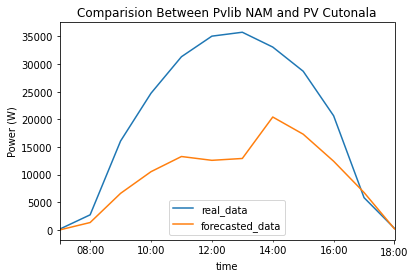

In [30]:
comparision.plot()
plt.ylabel('Power (W)')
plt.title('Comparision Between Pvlib NAM and PV Cutonala');

### RMSE

$  RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}} $

In [31]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
import numpy as np

In [33]:
real = comparision['real_data']

In [34]:
forecasted = comparision['forecasted_data']

In [35]:
print("MSE:"+str(mean_squared_error(forecasted, real)))
print("RMSE:"+str(np.sqrt(mean_squared_error(forecasted, real))))
print("MSLE:"+str(mean_squared_log_error(forecasted, real)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(forecasted, real))))
print("MAE:"+str(mean_absolute_error(forecasted, real)))

MSE:166805511.3118005
RMSE:12915.320797866405
MSLE:2.5264628030413347
RMSLE:1.5894850748092397
MAE:10148.733690362356
